In [ ]:
import torch
import torchvision.transforms.v2 as transforms
import torchvision.io as tv_io
import json
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

##1.Loading the Model
The link of every pretrained model in pytorch:https://pytorch.org/vision/stable/models.html

In [ ]:
from torchvision.models import vgg16
from torchvision.models import VGG16_Weights
# load the VGG16 network *pre-trained* on the ImageNet dataset
weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 79.1MB/s]


##2.Input Dimensions

In [ ]:
pre_trans = weights.transforms()
pre_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

##3.Loading an Image

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
  image = mpimg.imread(image_path)
  plt.imshow(image)

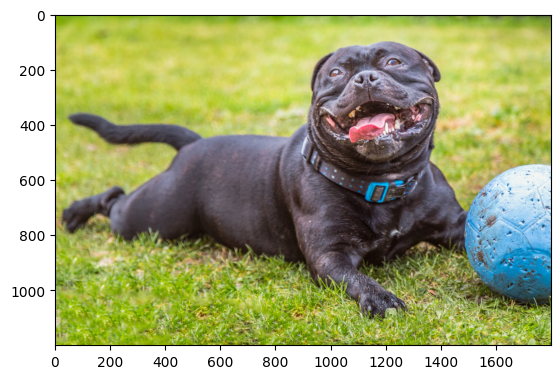

In [ ]:
show_image("/content/drive/MyDrive/LAB AI/Jupyter Notebook/happy_dog.jpg")

##4.Preprocessing the Image

In [ ]:
def load_and_process_image(file_path):
  print('Original image shape: ', mpimg.imread(file_path).shape)
  image = tv_io.read_image(file_path).to(device)
  image = pre_trans(image) #weights.transforms()
  image = image.unsqueeze(0) #Turn into a batch
  return image

In [ ]:
processed_image = load_and_process_image("/content/drive/MyDrive/LAB AI/Jupyter Notebook/happy_dog.jpg")
print("Processed image shape: ", processed_image.shape)

Original image shape:  (1200, 1800, 3)
Processed image shape:  torch.Size([1, 3, 224, 224])


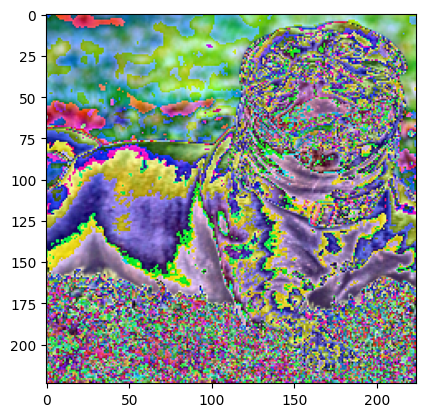

In [ ]:
import torchvision.transforms.functional as F
plot_img = F.to_pil_image(torch.squeeze(processed_image))
plt.imshow(plot_img,cmap = 'gray')

##5.Make a Prediction

In [ ]:
vgg_classes = json.load(open("/content/drive/MyDrive/LAB AI/Jupyter Notebook/imagenet_class_index.json"))

In [ ]:
vgg_classes["0"]

['n01440764', 'tench']

In [ ]:
def readable_prediction(image_path):
  #show image
  show_image(image_path)
  #load and preprocess image
  image = load_and_process_image(image_path)
  #make predictions
  output = model(image)[0] #Unbatch
  predictions = torch.topk(output,3)
  indices = predictions.indices.tolist()
  #Print predictions in readable form
  out_str = "Top results: "
  pred_classes = [vgg_classes[str(idx)][1] for idx in indices]
  out_str += ", ".join(pred_classes)
  print(out_str)
  return predictions


Original image shape:  (1200, 1800, 3)
Top results: Staffordshire_bullterrier, soccer_ball, Labrador_retriever


torch.return_types.topk(
values=tensor([14.5934, 11.9049, 11.6236], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([179, 805, 208], device='cuda:0'))

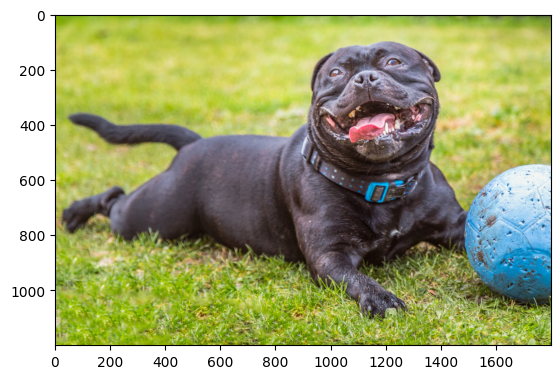

In [ ]:
readable_prediction("/content/drive/MyDrive/LAB AI/Jupyter Notebook/happy_dog.jpg")

Original image shape:  (1200, 1800, 3)
Top results: tiger_cat, tabby, Egyptian_cat


torch.return_types.topk(
values=tensor([16.2333, 13.7337, 11.6561], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([282, 281, 285], device='cuda:0'))

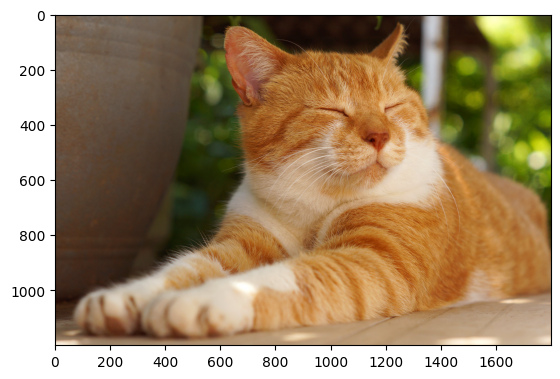

In [ ]:
readable_prediction("/content/drive/MyDrive/LAB AI/Jupyter Notebook/sleepy_cat.jpg")

Original image shape:  (2592, 3456, 3)
Top results: brown_bear, American_black_bear, sloth_bear


torch.return_types.topk(
values=tensor([42.8079, 31.3055, 24.4082], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([294, 295, 297], device='cuda:0'))

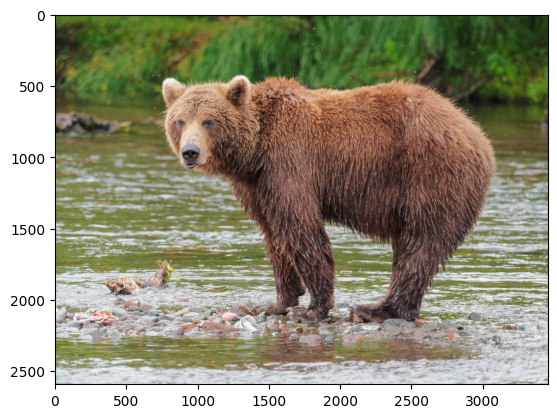

In [ ]:
readable_prediction("/content/drive/MyDrive/LAB AI/Jupyter Notebook/brown_bear.jpg")

Original image shape:  (425, 425, 3)
Top results: sea_slug, wall_clock, bib


torch.return_types.topk(
values=tensor([8.3118, 7.4446, 7.3581], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([115, 892, 443], device='cuda:0'))

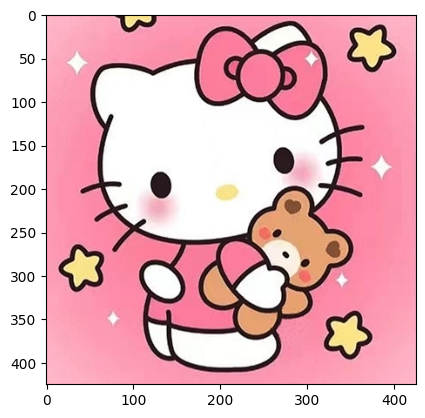

In [ ]:
readable_prediction("/content/drive/MyDrive/LAB AI/Jupyter Notebook/ngu.jpg")

Original image shape:  (675, 1200, 3)
Top results: Lhasa, Norfolk_terrier, Tibetan_terrier


torch.return_types.topk(
values=tensor([13.3673, 12.3721, 11.6546], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([204, 185, 200], device='cuda:0'))

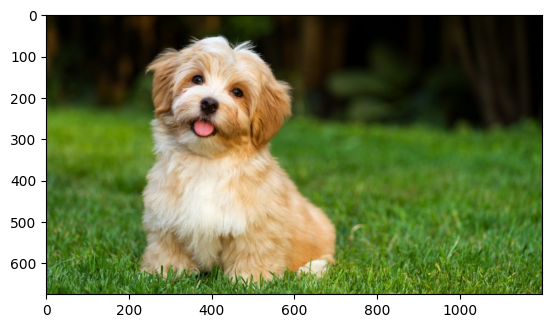

In [ ]:
readable_prediction("/content/drive/MyDrive/LAB AI/Jupyter Notebook/anh-cho-thumbnail.jpg")

##6.Only Dogs

In [ ]:
def doggy_door(image_path):
  show_image(image_path)
  image = load_and_process_image(image_path)
  idx = model(image).argmax(dim = 1).item()
  print('Predicted index:', idx)
  if 151 <= idx <= 268:print('It is a dog')
  elif 281 <= idx <= 285: print('It is a cat')
  else:print('Go away from there!')

Original image shape:  (1200, 1800, 3)
Predicted index: 179
It is a dog


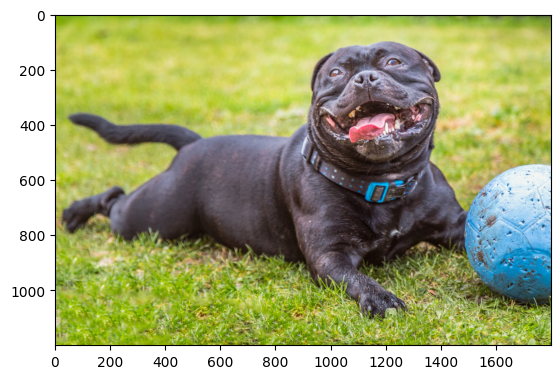

In [ ]:
doggy_door("/content/drive/MyDrive/LAB AI/Jupyter Notebook/happy_dog.jpg")

Original image shape:  (1200, 1800, 3)
Predicted index: 282
It is a cat


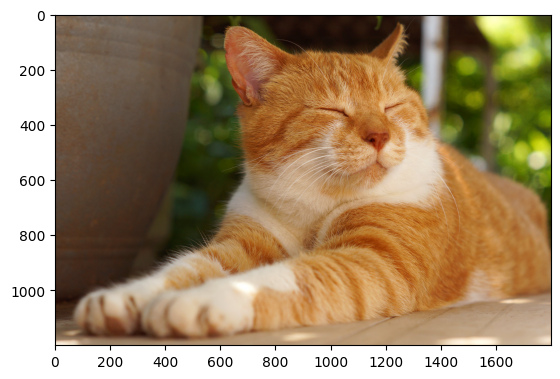

In [ ]:
doggy_door("/content/drive/MyDrive/LAB AI/Jupyter Notebook/sleepy_cat.jpg")

Original image shape:  (2592, 3456, 3)
Predicted index: 294
Go away from there!


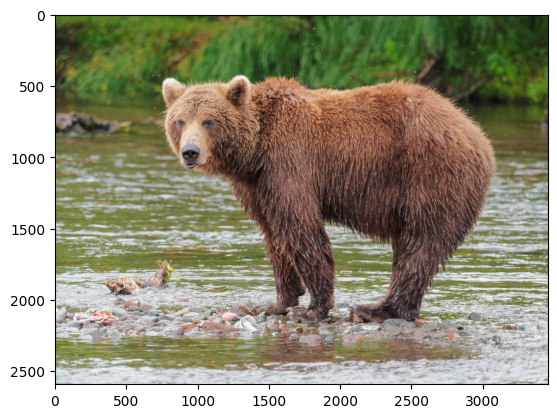

In [ ]:
doggy_door("/content/drive/MyDrive/LAB AI/Jupyter Notebook/brown_bear.jpg")

Original image shape:  (675, 1200, 3)
Predicted index: 204
It is a dog


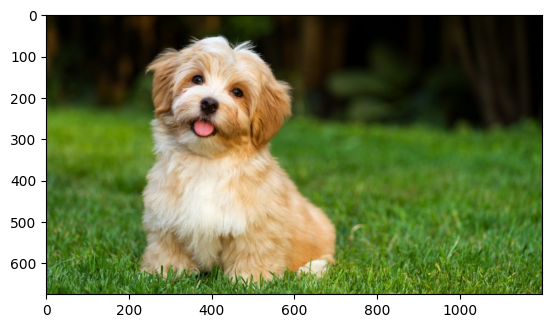

In [ ]:
doggy_door("/content/drive/MyDrive/LAB AI/Jupyter Notebook/anh-cho-thumbnail.jpg")

Original image shape:  (425, 425, 3)
Predicted index: 611
Go away from there!


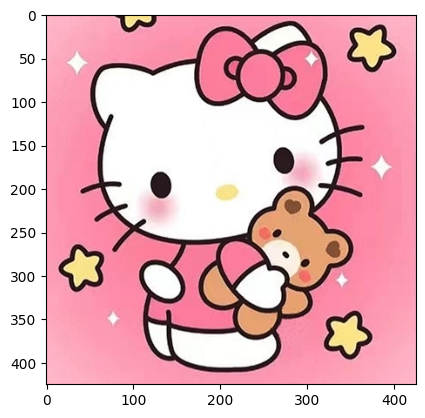

In [ ]:
doggy_door("/content/drive/MyDrive/LAB AI/Jupyter Notebook/ngu.jpg")

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}